In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)

CPU times: user 5.11 s, sys: 215 ms, total: 5.33 s
Wall time: 5.75 s


In [4]:
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [5]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 994 ms, sys: 37.1 ms, total: 1.03 s
Wall time: 1.12 s


In [6]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-09-19
1,0_1_0,2008,Poland,2008-11-14
2,Ai no Sanka,1967,Japan,1967-01-01
3,Affected (III),2011,USA,2011-10-14
4,A Reason,2014,USA,2014-06-01


In [7]:
titles = cast[['title', 'year']].drop_duplicates().reset_index(drop=True)
titles.head()

,title,year
0,The Core,2003
1,Il momento di uccidere,1968
2,Across the Divide,1921
3,Revan,2012
4,Un homme marche dans la ville,1950


### Years

In [38]:
# 1. How many movies are listed in the `titles` dataframe?

len(titles)

214386

In [51]:
# 1. What is the name and year of the very first movie?

titles.sort('year').head(1)

,title,year
100983,Miss Jerry,1894


In [63]:
# 1. How many years into the future does the IMDB database list movie titles?

titles.sort('year').tail(3)#.year - 2015

,title,year
208386,The Understander,2021
200027,Model Combat,2021
208929,Edge of Time,2021


In [36]:
# 1. How many movies listed in `titles` came out in 1950?

len(titles[titles.year == 1950])

# or: (titles.year == 1950).sum()

1158

In [35]:
# 1. How many movies came out in 1960?

len(titles[titles.year == 1960])

1441

In [39]:
# 1. How many movies came out in each year of the 1970s
#    (hint: try a simple Python "for" loop)?

for y in range(1970, 1980):
    print(y, (titles.year == y).sum())

1970 1876
1971 1774
1972 1840
1973 1813
1974 1795
1975 1704
1976 1716
1977 1686
1978 1679
1979 1757


In [41]:
# 1. How many movies came out during your own lifetime, through 2014?

len(titles[(titles.year >= 1974) & (titles.year <= 2014)])

127060

In [147]:
titles.head()
#v = titles.year.value_counts()

,title,year
0,The Core,2003
1,Il momento di uccidere,1968
2,Across the Divide,1921
3,Revan,2012
4,Un homme marche dans la ville,1950


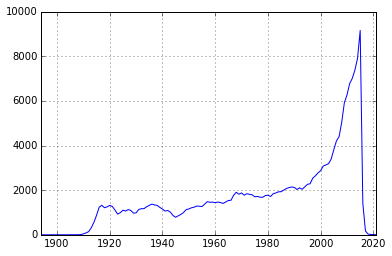

In [146]:
v.sort_index().plot()

In [10]:
# 3. Use "groupby" to determine how many movies came out in each year of the 1970s.

titles.groupby('year').size().loc[1970:1979]

year
1970    1876
1971    1774
1972    1840
1973    1813
1974    1795
1975    1704
1976    1716
1977    1686
1978    1679
1979    1757
dtype: int64

### Titles

In [44]:
# 1. What are the names of the movies made through 1906?

titles[titles.year <= 1906][['title']]

,title
100983,Miss Jerry
104766,Soldiers of the Cross
140912,Can Can
142404,The Story of the Kelly Gang
173490,Jeffries-Sharkey Contest
173746,Valsons
173859,The Joe Gans-Battling Nelson Fight
174032,Battle of Jeffries and Sharkey for Championship of the World
174343,Sr. Wrangler Mr. R.P. Paranjpe
205246,Lika mot lika


In [12]:
# 1. What movies have titles that fall between Star Trek and Star Wars in the alphabet?

titles[(titles.title >= 'Star Trek') & (titles.title <= 'Star Wars')]

,title,year
2056,Star Wars,1977
9814,Star Trek,2009
9886,Star Trek Into Darkness,2013
27553,Star Trek III: The Search for Spock,1984
29784,Star Trek: The Wrath of Khan,1982
30814,Star Trek: The Motion Picture,1979
33378,Star Trek: Nemesis,2002
39810,Star Trek: First Contact,1996
39824,Star Trek: Generations,1994
59379,Star Trek VI: The Undiscovered Country,1991


In [13]:
# 1. What are the 15 most common movie titles in film history?

titles.title.value_counts().head(15)

Hamlet           17
Carmen           14
Macbeth          14
Anna Karenina    12
Maya             11
Underground      11
Othello          10
Anna             10
She              10
The Outsider     10
Blood Money      10
Jackpot          10
Temptation       10
Revenge          10
The Promise       9
dtype: int64

In [14]:
# 2. Use an index and .loc[] to find the movies whose titles fall between Star Trek
#    and Star Wars in the alphabet.

t = titles.copy()
t = t.set_index('title').sort_index()
t.loc['Star Trek':'Star Wars']

,year
title,
Star Trek,2009
Star Trek I: Specter of the Past,2010
Star Trek III: The Search for Spock,1984
Star Trek IV: The Voyage Home,1986
Star Trek Into Darkness,2013
Star Trek V: The Final Frontier,1989
Star Trek VI: The Undiscovered Country,1991
Star Trek World Tour,1998
Star Trek: First Contact,1996


In [15]:
# 2. Use an index and .loc[] to retrieve the names of the movies made through 1906.

titles.set_index('year').sort_index().loc[1800:1906]

,title
year,
1894,Miss Jerry
1898,Can Can
1899,Jeffries-Sharkey Contest
1899,Battle of Jeffries and Sharkey for Championshi...
1900,Soldiers of the Cross
1902,Sr. Wrangler Mr. R.P. Paranjpe
1905,Valsons
1905,Eine Fliegenjagd oder Die Rache der Frau Schultze
1906,The Story of the Kelly Gang


In [16]:
# 3. 

i = cast.set_index('name').sort_index()

n              
     min      mean max
year                  
1932   1  5.125000   9
1933   1  3.166667  10
1934   1  1.500000   2
1935   1  1.750000   2
1936   1  1.750000   3
1937   2  2.000000   2
1938   2  2.000000   2
1939   1  1.333333   2
1940   1  1.250000   2
1941   1  1.500000   2
1942   1  1.000000   1
1943   1  1.000000   1
1944   1  1.000000   1
1945 NaN       NaN NaN
1946   1  1.000000   1
1947   1  1.000000   1
1948   1  1.000000   1
1949   1  1.000000   1
1950   1  1.000000   1
1951   1  1.000000   1
1952   1  1.000000   1
1953   1  1.000000   1
1955   1  1.000000   1
1957   1  1.000000   1
1958   1  1.000000   1
1959   1  1.000000   1
1960   1  1.000000   1
1962   1  1.000000   1
1963   1  1.000000   1
1964   1  1.000000   1
1966   1  1.000000   1
1981 NaN       NaN NaN
1987 NaN       NaN NaN
1988 NaN       NaN NaN
2002 NaN       NaN NaN

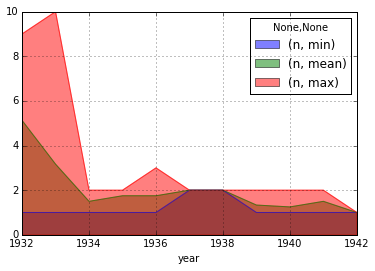

In [17]:
a = i.loc['Cary Grant',['year','n']].groupby('year').agg(['min', 'mean', 'max'])
a.loc[:1942].plot(kind='area', stacked=False)
a

In [18]:
# 5. What are the 5 longest movie titles ever?

pd.set_option('max_colwidth', 300)

t = titles.copy()
t['len'] = t.title.str.len()
t = t.sort('len', ascending=False)
t.head()

,title,year,len
163401,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,208
154042,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005,196
120466,Las poquianchis (De los pormenores y otros sucedidos del dominio público que acontecieron a las hermanas de triste memoria a quienes la maledicencia así las bautizó),1976,165
40308,Entrei em Pânico ao Saber o que Vocês Fizeram na Sexta-feira 13 do Verão Passado Parte 2 - A Hora da Volta da Vingança dos Jogos Mortais de Halloween,2011,149
173052,Die Antigone des Sophokles nach der Hölderlinschen Übertragung für die Bühne bearbeitet von Brecht 1948 (Suhrkamp Verlag),1992,121


In [19]:
# 5. What are the 15 most popular movie titles, if you strip off the suffixes like
#    (II) and (III) that the IMDB adds to distinguish movies shown in the same year?

titles.title.str.extract('^([^(]*)').value_counts().head(15)

                 24
Hamlet           17
Broken           15
Macbeth          14
Carmen           14
Anna Karenina    12
Maya             11
Underground      11
Revenge          10
Temptation       10
Jackpot          10
Alone            10
Anna             10
Love             10
She              10
dtype: int64

### Cast by title and year

In [77]:
# 1. How many movies has Judi Dench acted in?

len(cast[cast.name == 'Judi Dench'])

51

In [86]:
# 1. How many movies did Cary Grant appear in, versus in how many was he the lead
#    (in which case his `n` rank will equal 1)?

c = cast
c = c[c.name == 'Cary Grant']
print(len(c), 'total')
c = c[c.n == 1]
print(len(c), 'the star')

81 total
46 the star


In [76]:
# 1. List the movies, sorted by year, in which Sidney Poitier starred as lead actor.

c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n == 1]
c.sort('year')

,title,year,name,type,character,n
793662,Porgy and Bess,1959,Sidney Poitier,actor,Porgy,1
2035395,A Raisin in the Sun,1961,Sidney Poitier,actor,Walter Lee Younger,1
766961,Pressure Point,1962,Sidney Poitier,actor,Doctor,1
2335448,Lilies of the Field,1963,Sidney Poitier,actor,Homer Smith,1
2855909,A Patch of Blue,1965,Sidney Poitier,actor,Gordon Ralfe,1
2449833,The Slender Thread,1965,Sidney Poitier,actor,Alan Newell,1
2836931,"To Sir, with Love",1967,Sidney Poitier,actor,Mark Thackeray,1
2872922,In the Heat of the Night,1967,Sidney Poitier,actor,Virgil Tibbs,1
2453104,For Love of Ivy,1968,Sidney Poitier,actor,Jack Parks,1
2789529,The Lost Man,1969,Sidney Poitier,actor,Jason Higgs,1


In [91]:
# 1. Who was credited in the 1972 version of Sleuth, in order by `n` rank?

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c.sort('n')

,title,year,name,type,character,n
2815436,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1985454,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
2004531,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
2707118,Sleuth,1972,John Matthews (II),actor,Detective Sergeant Tarrant,4
3292963,Sleuth,1972,Eve Channing (III),actress,Marguerite Wyke,5
2693963,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6


In [96]:
# 1. What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself      24293
Dancer       11697
Extra         8865
Reporter      7792
Doctor        7666
Herself       7501
Policeman     7245
Student       6694
Nurse         6636
Bartender     6298
Zombie        5785
dtype: int64

In [124]:
# 1. Which actors or actresses appeared in the most movies in the year 1980?

cast[cast.year == 1984].name.value_counts().head(10)

Mammootty           34
Mohanlal            26
Sukumari            19
Shakti Kapoor       17
Helen Kelly         16
Satyendra Kapoor    15
Leena Das           14
Iftekhar            14
Amrish Puri         13
Menaka              13
dtype: int64

In [153]:
# 2. Create a `cast_by_title_year` dataframe indexed by title and year
#    to use in the next few questions.

cast_by_title_year = cast.set_index(['title', 'year']).sort_index()
cast_by_title_year.head()

name     type     character   n
title      year                                              
#5         2013       Justin Bardy    actor             X NaN
           2013        Ricky Bardy    actor   Ricky Bardy NaN
#50Fathers 2015    Tatiana Capeles  actress        Kendra NaN
           2015      Joseph Primes    actor  Uncle Freddy NaN
           2015  Denny Castiglione    actor  Coach Sankey NaN

In [157]:
# 2. Use `cast_by_title_year` to find the top 10 stars in the film Inception,
#    in order by `n`.

cast_by_title_year.loc['Inception'].sort('n').head(10)

,name,type,character,n
year,,,,
2010,Leonardo DiCaprio,actor,Cobb,1
2010,Joseph Gordon-Levitt,actor,Arthur,2
2010,Ellen Page,actress,Ariadne,3
2010,Tom Hardy,actor,Eames,4
2010,Ken Watanabe,actor,Saito,5
2010,Dileep Rao,actor,Yusuf,6
2010,Cillian Murphy,actor,Robert Fischer,7
2010,Tom Berenger,actor,Browning,8
2010,Marion Cotillard,actress,Mal,9


In [160]:
# 2. Use `cast_by_title_year` to find the first 10 stars in the 1996 film Hamlet,
#    in order by `n`.

cast_by_title_year.loc['Hamlet',1996].sort('n').head(10)

name     type                 character   n
title  year                                                             
Hamlet 1996            Riz Abbasi    actor     Attendant to Claudius   1
       1996  Richard Attenborough    actor        English Ambassador   2
       1996       David Blair (V)    actor     Attendant to Claudius   3
       1996         Brian Blessed    actor  Ghost of Hamlet's Father   4
       1996       Kenneth Branagh    actor                    Hamlet   5
       1996        Richard Briers    actor                  Polonius   6
       1996        Michael Bryant    actor                    Priest   7
       1996          Peter Bygott    actor     Attendant to Claudius   8
       1996        Julie Christie  actress                  Gertrude   9
       1996         Billy Crystal    actor         First Gravedigger  10

In [190]:
# 2. Write a `for` loop that, for the top 9 actors in the 1977 movie Star Wars,
#    determines how many movies they starred in after 1977.

In [192]:
%%time
names = cast_by_title_year.loc['Star Wars',1977].sort('n').head(9).name
for name in names:
    print(name, len(cast[(cast.name == name) & (cast.year > 1977)]))

Mark Hamill 42
Harrison Ford 44
Carrie Fisher 40
Peter Cushing 10
Alec Guinness 9
Anthony Daniels 11
Kenny Baker 18
Peter Mayhew (II) 7
David Prowse 5
CPU times: user 3.46 s, sys: 11 ms, total: 3.47 s
Wall time: 3.47 s


In [198]:
# 2. Create an indexed version of `cast` that, once built, lets you answer
#    the previous question with a `for` loop that finishes in under a second.

i = cast.set_index('name').sort_index()

In [212]:
%%time
for name in names:
    c = i.loc[name]
    c[c.year > 1977]
    print(name, len(c))

Mark Hamill 44
Harrison Ford 54
Carrie Fisher 42
Peter Cushing 94
Alec Guinness 56
Anthony Daniels 12
Kenny Baker 21
Peter Mayhew (II) 9
David Prowse 25
CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 11.7 ms


In [164]:
# 2. How many actors were in each movie named "Hamlet”?

c = cast_title_year
c.loc['Hamlet'].index.value_counts().sort_index()

1910     1
1911     6
1913    21
1921     9
1948    25
1954     1
1964    33
1969    24
1973     8
1976    11
1987     3
1990    29
1996    55
2000    38
2009    17
2011    12
2015     6
dtype: int64

In [149]:
# 2. For each actor and actress in Star Wars in order by `n`,
#    

name     type     character   n
title      year                                              
#5         2013       Justin Bardy    actor             X NaN
           2013        Ricky Bardy    actor   Ricky Bardy NaN
#50Fathers 2015    Tatiana Capeles  actress        Kendra NaN
           2015      Joseph Primes    actor  Uncle Freddy NaN
           2015  Denny Castiglione    actor  Coach Sankey NaN

In [222]:
# 3. How many actors are in the cast of each version of Hamlet,
#    including Hamlets with IMDB name collisions like "Hamlet (II)"
#    and "Hamlet (III)"?

c = cast_title_year
# c.loc['Hamlet':'Hamlet (Z'].index.value_counts()    - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=0).size() - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=1).size() - Drat
c.loc['Hamlet':'Hamlet (Z'].groupby(level=[0,1]).size()

# Or:
#c = cast[(cast.title >= 'Hamlet') & (cast.title < 'Hamlet (Z')]
#c.groupby(['title', 'year']).size()

title         year
Hamlet        1910     1
              1911     6
              1913    21
              1921     9
              1948    25
              1954     1
              1964    33
              1969    24
              1973     8
              1976    11
              1987     3
              1990    29
              1996    55
              2000    38
              2009    17
              2011    12
              2015     6
Hamlet (II)   1964    21
              2005    20
              2007    16
              2015    10
Hamlet (III)  2007     2
              2015    14
dtype: int64

In [221]:
c.reset_index()

,name,title,year,type,character,n
0,David Prowse,Crossplot,1969,actor,Wedding guest,32
1,David Prowse,The People That Time Forgot,1977,actor,Executioner,9
2,David Prowse,A Clockwork Orange,1971,actor,Julian,25
3,David Prowse,Vampire Circus,1972,actor,Strongman,18
4,David Prowse,Hammerhead,1968,actor,George,16
5,David Prowse,The Best of Benny Hill,1974,actor,Muscleman,20
6,David Prowse,Star Wars: Episode V - The Empire Strikes Back,1980,actor,Darth Vader,6
7,David Prowse,Star Wars,1977,actor,Darth Vader,9
8,David Prowse,Star Wars: Episode VI - Return of the Jedi,1983,actor,Darth Vader,11
9,David Prowse,White Cargo,1973,actor,Harry,5


### Actors and Actresses

In [367]:
# 4. Build a dataframe with a row for each year with two columns:
#    the number of roles for actors and the number of roles for actresses
#    in that year's films.

aa = cast[['year', 'type']].groupby(['year', 'type']).size()
aa = aa.loc[:2014].unstack()
aa.head()

type,actor,actress
year,,
1894,2,1
1898,NaN,1
1899,6,NaN
1900,2,NaN
1902,1,NaN


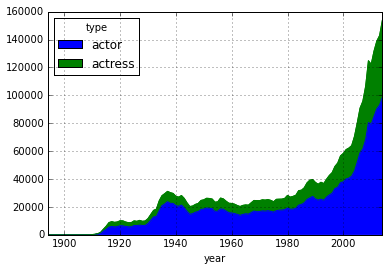

In [261]:
# 4. Use that dataframe to make an area plot showing the total
#    number of roles available over the history of film.

aa.plot(kind='area')

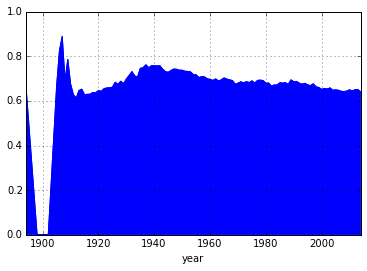

In [255]:
f = aa.actor / (aa.actor + aa.actress)
f.plot(ylim=[0,1], kind='area')

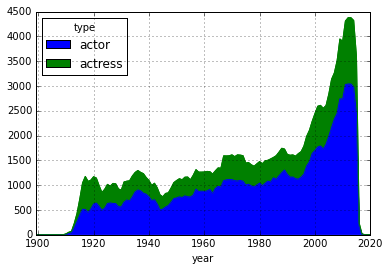

In [369]:
c = cast
#c = c[c.year // 10 == 198]
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack(1)
c.swaplevel(0,1).loc[1].plot(ylim=0, kind='area')
#f = c.actor / (c.actor + c.actress)
#f = f.unstack()
#f.plot(ylim=[0,1])

### Release dates

In [393]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-09-19
1,0_1_0,2008,Poland,2008-11-14
2,Ai no Sanka,1967,Japan,1967-01-01
3,Affected (III),2011,USA,2011-10-14
4,A Reason,2014,USA,2014-06-01


In [380]:
rd = release_dates.set_index(['title', 'year']).sort_index()
rd.head()

,,country,date
title,year,,
#50Fathers,2015,USA,2015-07-04
"#73, Shaanthi Nivaasa",2007,India,2007-06-15
#Beings,2015,Romania,2015-01-29
#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
#Horror,2015,USA,2015-01-01


In [415]:
c = cast
c = c[c.name == 'George Clooney'][['title', 'year']]
c = c.join(rd, ['title', 'year'])
c = c.set_index('date').sort_index()
c

,title,year,country
date,,,
1987-01-28,Return to Horror High,1987,USA
1988-04-22,Return of the Killer Tomatoes!,1988,USA
1988-10-13,Return of the Killer Tomatoes!,1988,Australia
1988-10-31,Return of the Killer Tomatoes!,1988,Brazil
1990-08-24,Return of the Killer Tomatoes!,1988,Japan
1992-10-04,The Harvest,1992,USA
1993-11-05,The Harvest,1992,USA
1994-01-20,The Harvest,1992,Germany
1994-02-04,The Harvest,1992,Spain


In [395]:
c = cast
c = c[c.name == 'George Clooney'] #[['title', 'year']]
c = c.set_index(['title', 'year']).sort_index()
release_dates.join(c, on=['title', 'year'])

,title,year,country,date,name,type,character,n
0,0_1_0,2008,Poland,2008-09-19,NaN,NaN,NaN,NaN
1,0_1_0,2008,Poland,2008-11-14,NaN,NaN,NaN,NaN
2,Ai no Sanka,1967,Japan,1967-01-01,NaN,NaN,NaN,NaN
3,Affected (III),2011,USA,2011-10-14,NaN,NaN,NaN,NaN
4,A Reason,2014,USA,2014-06-01,NaN,NaN,NaN,NaN
5,A Reason,2014,USA,2014-10-19,NaN,NaN,NaN,NaN
6,A Thousand to One,1920,USA,1920-12-04,NaN,NaN,NaN,NaN
7,A Prince of a King,1923,USA,1923-10-13,NaN,NaN,NaN,NaN
8,A Prince of a King,1923,Netherlands,1924-08-08,NaN,NaN,NaN,NaN
9,A Prince of a King,1923,Portugal,1925-08-17,NaN,NaN,NaN,NaN
